In [1]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
import networkx as nx

Create these two lattices and transition between them:
<img src="Isospectral_drums.png" style="width: 500px;"/>

Image from https://commons.wikimedia.org/wiki/File:Isospectral_drums.svg


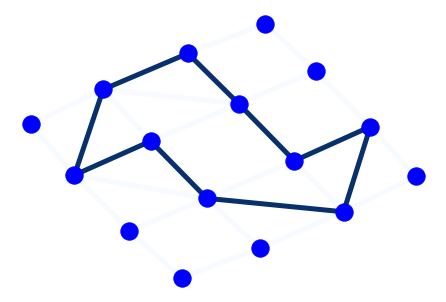

In [73]:
# left image from above, edges are resonators

# make all hopping terms zero
g_l = nx.grid_graph([4,4])
pos = nx.spring_layout(g_l)
edge_list = [e for e in g_l.edges]
for i in range(0, len(edge_list)):
    g_l[edge_list[i][0]][edge_list[i][1]]['weight'] = 0

# fill in hopping terms for right image, keep at 0
hop_list_r = [((0,3),(1,3)),((1,3),(1,2)),((1,2),(2,2)), ((2,2),(3,1)), ((3,1),(2,1)), ((2,1),(2,0)),
             ((2,0),(1,1)),((1,1),(0,2)), ((0,2),(0,3))]
g_l.add_edges_from(hop_list_r)
for i in range(0, len(hop_list_r)):
    g_l[hop_list_r[i][0]][hop_list_r[i][1]]['weight'] = 0
    
# fill in hopping terms for left image, make them 1
hop_list_l = [((0,2),(1,3)), ((1,3),(1,2)), ((1,2),(2,2)), ((2,2),(3,2)), ((3,2),(3,1)), 
           ((3,1),(2,0)), ((2,0),(2,1)), ((2,1),(1,1)), ((1,1),(0,2))]
g_l.add_edges_from(hop_list_l)
for i in range(0, len(hop_list_l)):
    g_l[hop_list_l[i][0]][hop_list_l[i][1]]['weight'] = 1
    
edges,weights = zip(*nx.get_edge_attributes(g_l,'weight').items())
nx.draw(g_l, pos, node_color='b', edgelist=edges, edge_color=weights, width=5, edge_cmap=plt.cm.Blues)

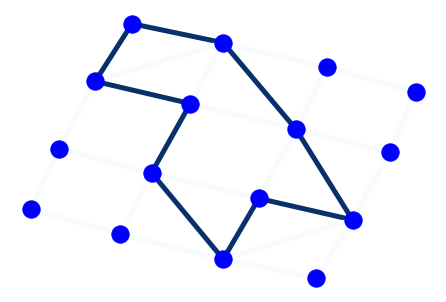

In [74]:
# right image from above, edges are resonators

# make all hopping terms zero
g_r = nx.grid_graph([4,4])
pos = nx.spring_layout(g_r)
edge_list = [e for e in g_r.edges]
for i in range(0, len(edge_list)):
    g_r[edge_list[i][0]][edge_list[i][1]]['weight'] = 0
    
# fill in hopping terms for left image, keep at 0
hop_list_l = [((0,2),(1,3)), ((1,3),(1,2)), ((1,2),(2,2)), ((2,2),(3,2)), ((3,2),(3,1)), 
           ((3,1),(2,0)), ((2,0),(2,1)), ((2,1),(1,1)), ((1,1),(0,2))]
g_r.add_edges_from(hop_list_l)
for i in range(0, len(hop_list_l)):
    g_r[hop_list_l[i][0]][hop_list_l[i][1]]['weight'] = 0

# fill in hopping terms for right image, make them 1
hop_list_r = [((0,3),(1,3)),((1,3),(1,2)),((1,2),(2,2)), ((2,2),(3,1)), ((3,1),(2,1)), ((2,1),(2,0)),
             ((2,0),(1,1)),((1,1),(0,2)), ((0,2),(0,3))]
g_r.add_edges_from(hop_list_r)
for i in range(0, len(hop_list_r)):
    g_r[hop_list_r[i][0]][hop_list_r[i][1]]['weight'] = 1
    
    
edges,weights = zip(*nx.get_edge_attributes(g_r,'weight').items())
nx.draw(g_r, pos, node_color='b', edgelist=edges, edge_color=weights, width=5.0, edge_cmap=plt.cm.Blues)

In [25]:
# plot spectrum function
def spec(g, title):
    w, v = la.eig(np.array(nx.adjacency_matrix(g).todense()))
    plt.plot(range(1, len(w) + 1), np.sort(np.real(w)), 'ro')
    plt.xlabel('Eigenvalue index')
    plt.ylabel('Eigenvalue')
    plt.title(title)
    #plt.rcParams["figure.figsize"] = [16,9]
    plt.show()
    return w, v

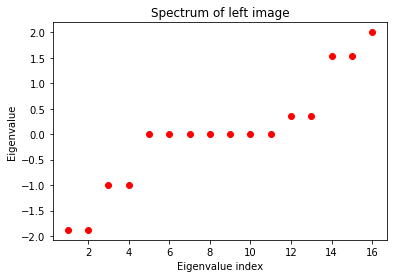

In [49]:
w_l, v_l = spec(g_l, 'Spectrum of left image')

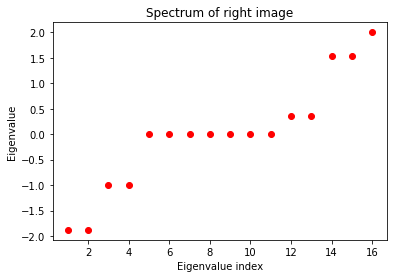

In [50]:
w_r, v_r = spec(g_r, 'Spectrum of right image')

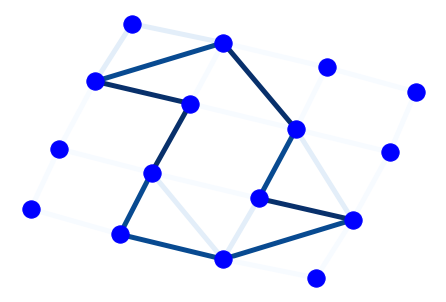

In [82]:
# morph left into right in 10 even steps keeping common edges the same
g_i = g_l
inter_mult = np.arange(0.1, 1.1, 0.1)

g_l_exclusive = [((0,2),(1,3)), ((2,2),(3,2)), ((3,2),(3,1)), ((3,1),(2,0)), ((2,1),(1,1))]
g_r_exclusive = [((0,2),(0,3)), ((0,3),(1,3)), ((2,2),(3,1)), ((3,1),(2,1)), ((2,0),(1,1))]

for i in range(0, len(g_l_exclusive)):
    g_i[g_l_exclusive[i][0]][g_l_exclusive[i][1]]['weight'] = 1 - inter_mult[0]
    
for i in range(0, len(g_r_exclusive)):
    g_i[g_r_exclusive[i][0]][g_r_exclusive[i][1]]['weight'] = inter_mult[0]
    

edges,weights = zip(*nx.get_edge_attributes(g_i,'weight').items())
nx.draw(g_i, pos, node_color='b', edgelist=edges, edge_color=weights, width=5.0, edge_cmap=plt.cm.Blues)

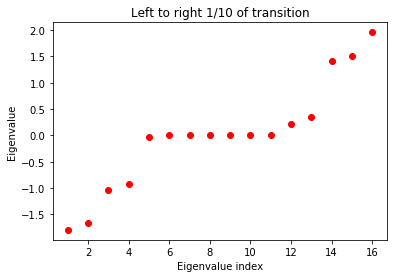

In [83]:
# make plots for each morph step
w_r, v_r = spec(g_i, 'Left to right 1/10 of transition')

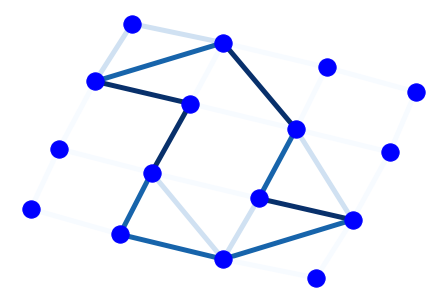

In [88]:
for i in range(0, len(g_l_exclusive)):
    g_i[g_l_exclusive[i][0]][g_l_exclusive[i][1]]['weight'] = 1 - inter_mult[1]
    
for i in range(0, len(g_r_exclusive)):
    g_i[g_r_exclusive[i][0]][g_r_exclusive[i][1]]['weight'] = inter_mult[1]
    

edges,weights = zip(*nx.get_edge_attributes(g_i,'weight').items())
nx.draw(g_i, pos, node_color='b', edgelist=edges, edge_color=weights, width=5.0, edge_cmap=plt.cm.Blues)

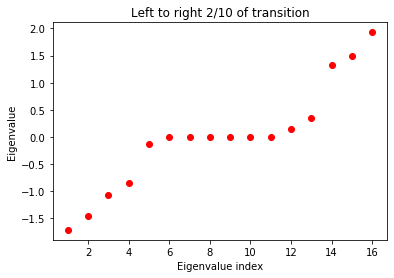

In [85]:
w_r, v_r = spec(g_i, 'Left to right 2/10 of transition')

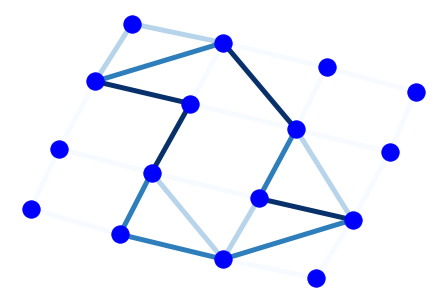

In [94]:
for i in range(0, len(g_l_exclusive)):
    g_i[g_l_exclusive[i][0]][g_l_exclusive[i][1]]['weight'] = 1 - inter_mult[2]
    
for i in range(0, len(g_r_exclusive)):
    g_i[g_r_exclusive[i][0]][g_r_exclusive[i][1]]['weight'] = inter_mult[2]
    

edges,weights = zip(*nx.get_edge_attributes(g_i,'weight').items())
nx.draw(g_i, pos, node_color='b', edgelist=edges, edge_color=weights, width=5.0, edge_cmap=plt.cm.Blues)

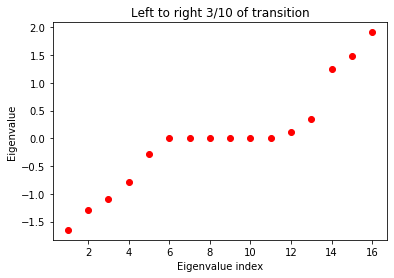

In [92]:
w_r, v_r = spec(g_i, 'Left to right 3/10 of transition')

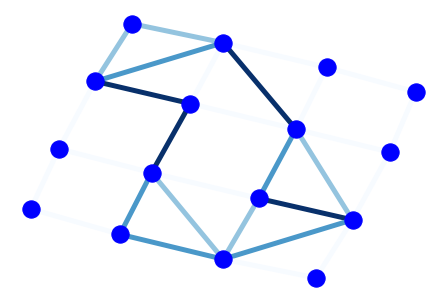

In [95]:
for i in range(0, len(g_l_exclusive)):
    g_i[g_l_exclusive[i][0]][g_l_exclusive[i][1]]['weight'] = 1 - inter_mult[3]
    
for i in range(0, len(g_r_exclusive)):
    g_i[g_r_exclusive[i][0]][g_r_exclusive[i][1]]['weight'] = inter_mult[3]
    

edges,weights = zip(*nx.get_edge_attributes(g_i,'weight').items())
nx.draw(g_i, pos, node_color='b', edgelist=edges, edge_color=weights, width=5.0, edge_cmap=plt.cm.Blues)

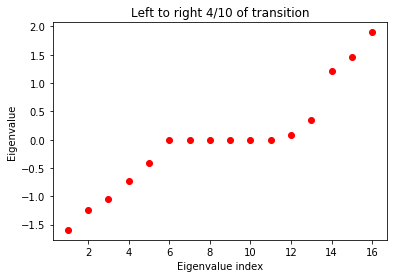

In [96]:
w_r, v_r = spec(g_i, 'Left to right 4/10 of transition')

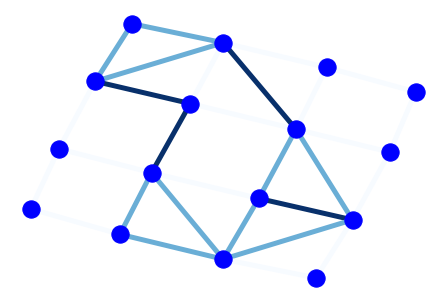

In [98]:
for i in range(0, len(g_l_exclusive)):
    g_i[g_l_exclusive[i][0]][g_l_exclusive[i][1]]['weight'] = 1 - inter_mult[4]
    
for i in range(0, len(g_r_exclusive)):
    g_i[g_r_exclusive[i][0]][g_r_exclusive[i][1]]['weight'] = inter_mult[4]
    

edges,weights = zip(*nx.get_edge_attributes(g_i,'weight').items())
nx.draw(g_i, pos, node_color='b', edgelist=edges, edge_color=weights, width=5.0, edge_cmap=plt.cm.Blues)

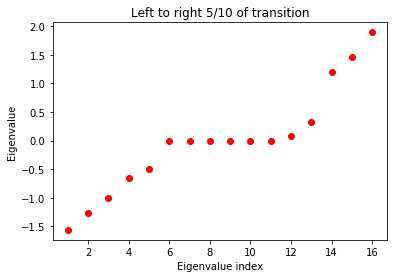

In [99]:
w_r, v_r = spec(g_i, 'Left to right 5/10 of transition')

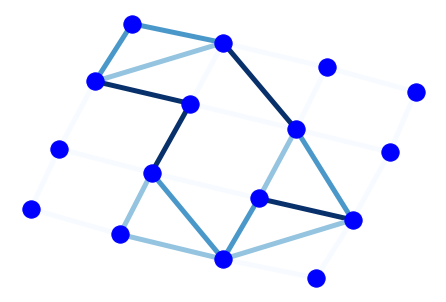

In [101]:
for i in range(0, len(g_l_exclusive)):
    g_i[g_l_exclusive[i][0]][g_l_exclusive[i][1]]['weight'] = 1 - inter_mult[5]
    
for i in range(0, len(g_r_exclusive)):
    g_i[g_r_exclusive[i][0]][g_r_exclusive[i][1]]['weight'] = inter_mult[5]
    

edges,weights = zip(*nx.get_edge_attributes(g_i,'weight').items())
nx.draw(g_i, pos, node_color='b', edgelist=edges, edge_color=weights, width=5.0, edge_cmap=plt.cm.Blues)

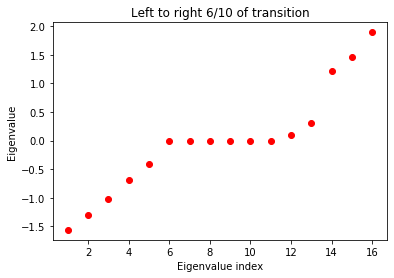

In [102]:
w_r, v_r = spec(g_i, 'Left to right 6/10 of transition')

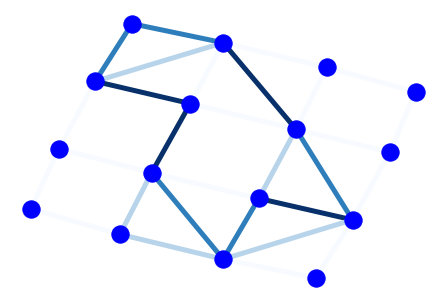

In [104]:
for i in range(0, len(g_l_exclusive)):
    g_i[g_l_exclusive[i][0]][g_l_exclusive[i][1]]['weight'] = 1 - inter_mult[6]
    
for i in range(0, len(g_r_exclusive)):
    g_i[g_r_exclusive[i][0]][g_r_exclusive[i][1]]['weight'] = inter_mult[6]
    

edges,weights = zip(*nx.get_edge_attributes(g_i,'weight').items())
nx.draw(g_i, pos, node_color='b', edgelist=edges, edge_color=weights, width=5.0, edge_cmap=plt.cm.Blues)

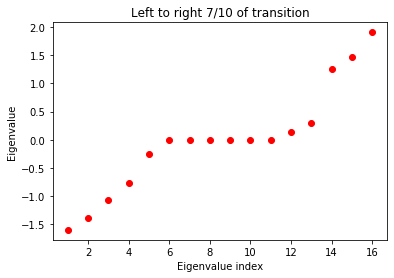

In [105]:
w_r, v_r = spec(g_i, 'Left to right 7/10 of transition')

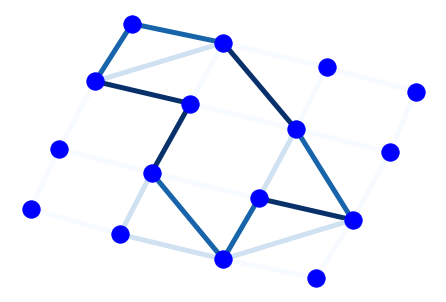

In [107]:
for i in range(0, len(g_l_exclusive)):
    g_i[g_l_exclusive[i][0]][g_l_exclusive[i][1]]['weight'] = 1 - inter_mult[7]
    
for i in range(0, len(g_r_exclusive)):
    g_i[g_r_exclusive[i][0]][g_r_exclusive[i][1]]['weight'] = inter_mult[7]
    

edges,weights = zip(*nx.get_edge_attributes(g_i,'weight').items())
nx.draw(g_i, pos, node_color='b', edgelist=edges, edge_color=weights, width=5.0, edge_cmap=plt.cm.Blues)

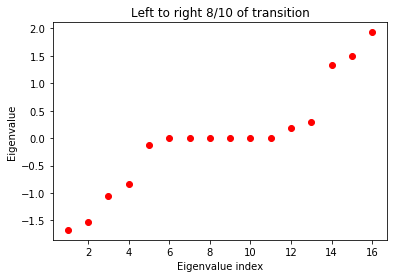

In [108]:
w_r, v_r = spec(g_i, 'Left to right 8/10 of transition')

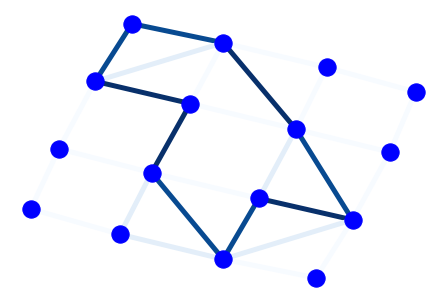

In [110]:
for i in range(0, len(g_l_exclusive)):
    g_i[g_l_exclusive[i][0]][g_l_exclusive[i][1]]['weight'] = 1 - inter_mult[8]
    
for i in range(0, len(g_r_exclusive)):
    g_i[g_r_exclusive[i][0]][g_r_exclusive[i][1]]['weight'] = inter_mult[8]
    

edges,weights = zip(*nx.get_edge_attributes(g_i,'weight').items())
nx.draw(g_i, pos, node_color='b', edgelist=edges, edge_color=weights, width=5.0, edge_cmap=plt.cm.Blues)

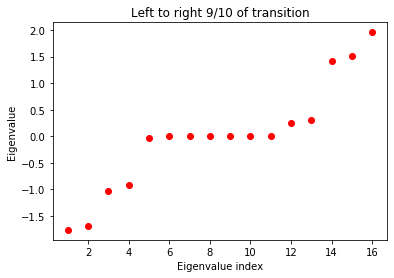

In [111]:
w_r, v_r = spec(g_i, 'Left to right 9/10 of transition')

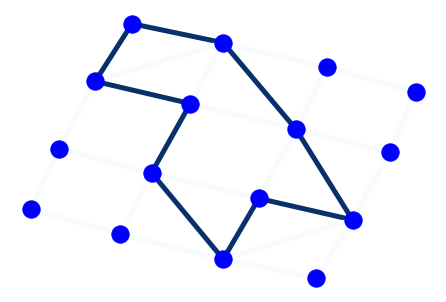

In [113]:
for i in range(0, len(g_l_exclusive)):
    g_i[g_l_exclusive[i][0]][g_l_exclusive[i][1]]['weight'] = 1 - inter_mult[9]
    
for i in range(0, len(g_r_exclusive)):
    g_i[g_r_exclusive[i][0]][g_r_exclusive[i][1]]['weight'] = inter_mult[9]
    

edges,weights = zip(*nx.get_edge_attributes(g_i,'weight').items())
nx.draw(g_i, pos, node_color='b', edgelist=edges, edge_color=weights, width=5.0, edge_cmap=plt.cm.Blues)

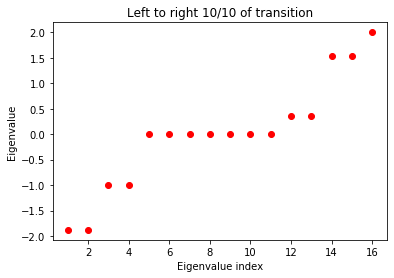

In [114]:
w_r, v_r = spec(g_i, 'Left to right 10/10 of transition')